In [ ]:
!pip install hgboost

Import the hgboost library

In [2]:
from hgboost import hgboost

Initialize using specified parameters. The parameters here are the default parameters.

In [26]:
hgb = hgboost(max_eval=250, threshold=0.5, cv=5, test_size=0.2, val_size=0.2, top_cv_evals=10, random_state=None, verbose=3)

Import example dataset. In this case it is the titanic dataset. We are going to set survived as our response variable (y). Lets see how good we can predict survived.

In [25]:
# Import data
df = hgb.import_example()
y = df['Survived'].values
del df['Survived']
X = hgb.preprocessing(df, verbose=0)

[hgboost] >Import dataset [titanic]


At this point we can initizalize which boosting model we want to **fit**. For **classification** there is the *xgboost*, *lightboost* or *xgboost*. In addition it is possible to fit an **ensemble** of all (specified) models. For demonstration we will first fit using *xgboost*. If other boosting methods are desired, simply uncomment. The pos_label is set to 1 because this depicts whether cases did *survived* this is the 

In [27]:
# Fit
# results = hgb.lightboost(X, y, pos_label=1)
# results = hgb.catboost(X, y, pos_label=1)
results = hgb.xgboost(X, y, pos_label=1)

[hgboost] >Start hgboost classification..
[hgboost] >Collecting xgb_clf parameters.
[hgboost] >Number of variables in search space is [10], loss function: [auc].
[hgboost] >method: xgb_clf
[hgboost] >eval_metric: auc
[hgboost] >greater_is_better: True
[hgboost] >Total datset: (891, 204) 
[hgboost] >Hyperparameter optimization..
100%|██████████| 1000/1000 [07:09<00:00,  2.33it/s, best loss: -0.887293388429752]

  0%|          | 0/10 [00:00<?, ?it/s]


[hgboost] >Best peforming [xgb_clf] model: auc=0.887293
[hgboost] >5-fold cross validation for the top 10 scoring models, Total nr. tests: 50


100%|██████████| 10/10 [00:10<00:00,  1.09s/it]

[hgboost] >Evalute best [xgb_clf] model on independent validation dataset (179 samples, 20%)
[hgboost] >[auc] on independent validation dataset: -0.8345
[hgboost] >Retrain [xgb_clf] on the entire dataset with the optimal parameters settings.
[hgboost] >Fin!


Done! Fast and clean! We evaluated 250 sets of parameters using HyperOpt in a cross-validation to determine the most optimal set of parameters for predictions using the specified evaluation metric (default is *auc*). We can now easily predict new samples using the **predict** function.

In [30]:
# Use the predictor
y_pred, y_proba = hgb.predict(X)

In [31]:
y_proba

array([[0.52156126, 0.47843874],
       [0.4754268 , 0.5245732 ],
       [0.4902981 , 0.5097019 ],
       ...,
       [0.50971854, 0.49028146],
       [0.4975763 , 0.5024237 ],
       [0.52156126, 0.47843874]], dtype=float32)

In [35]:
# First 10 elements
y_pred[0:10]

array([False,  True,  True,  True, False, False, False,  True,  True,
        True])

Lets examine the hyper-parameters. We can plot all the individual parameters examine the density, and how the parameters evolve over the iterations.

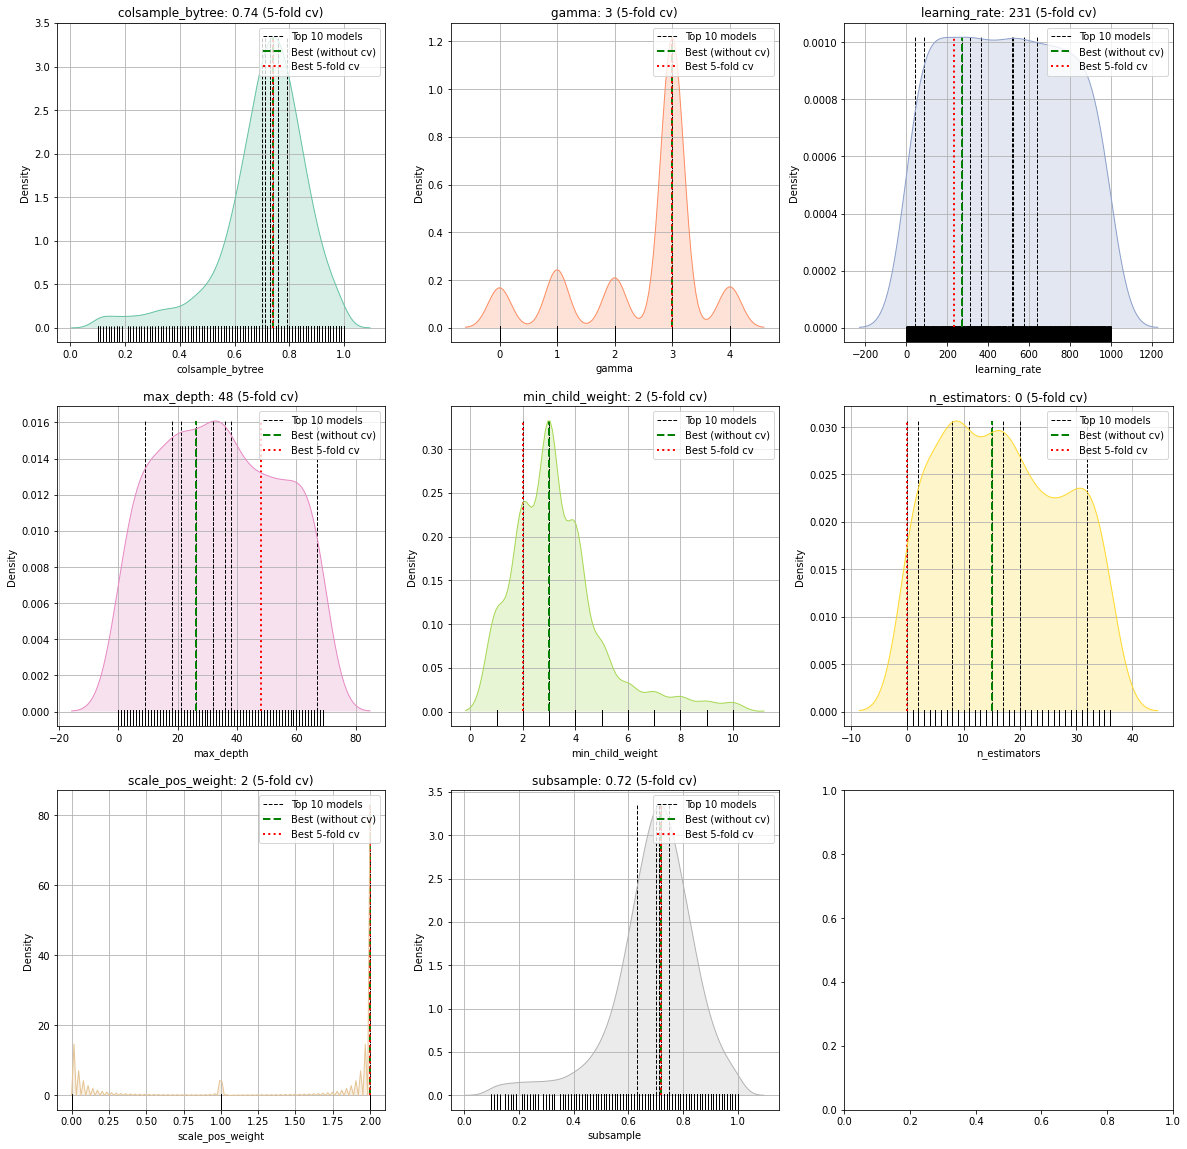

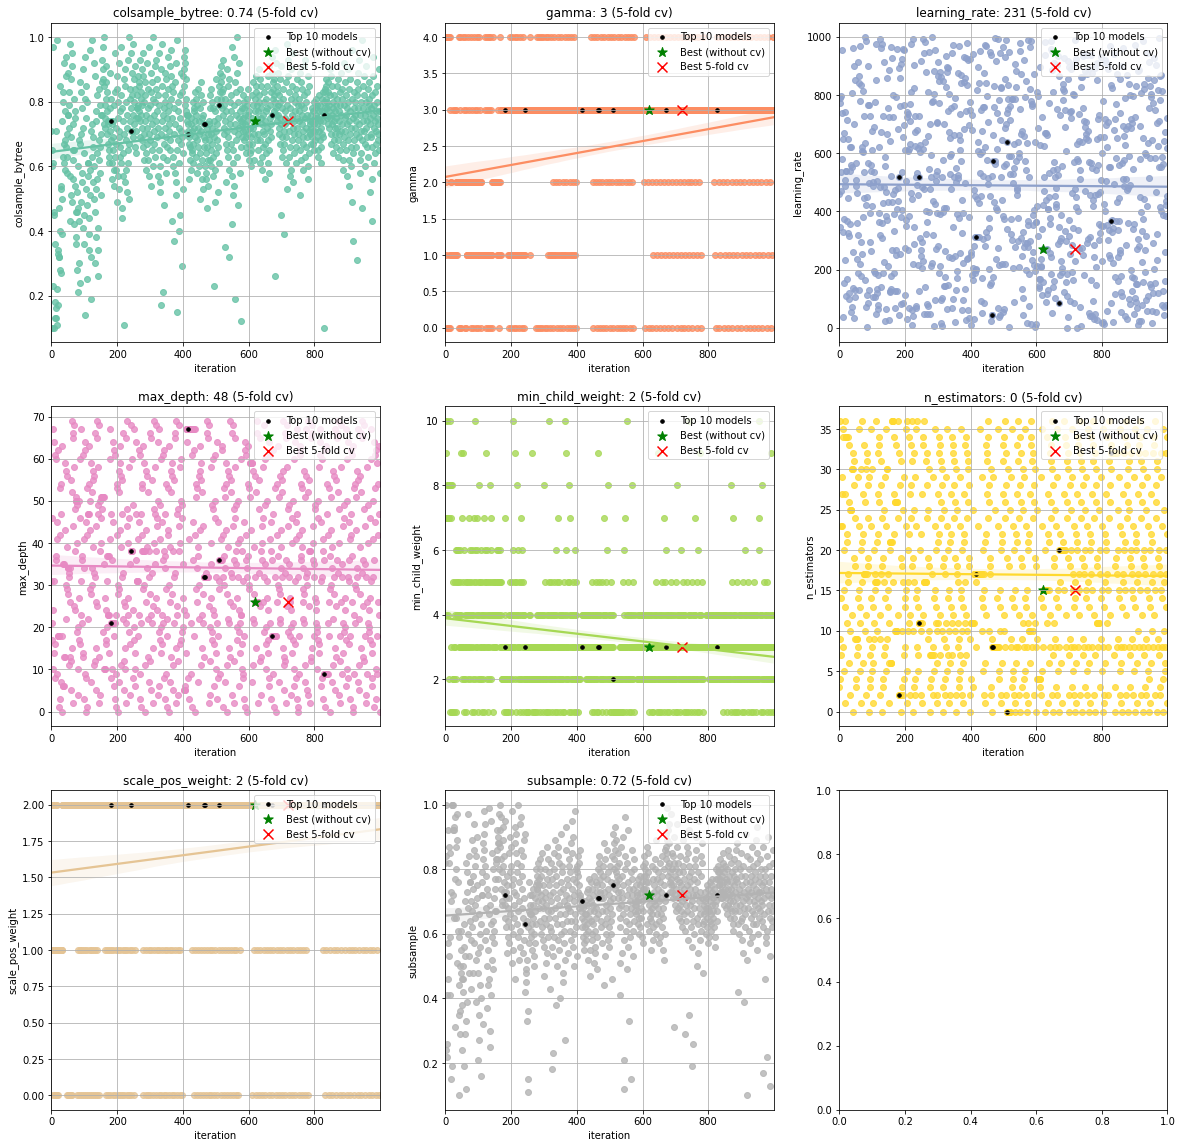

In [28]:
# Make some plots
hgb.plot_params(figsize=(20,20))

Examine each of the iterations. The top 10 results with cross validation are depicted with blue bars. The green dashed line is hte best model without using CV. The red dashed line is the best model with CV. It can be seen that iterations are available that scored higher then the CV but are not selected.

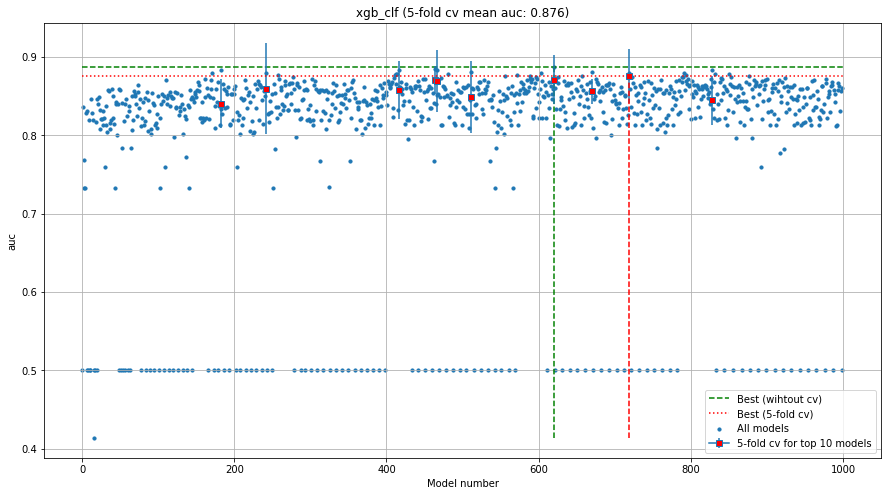

In [36]:
hgb.plot(figsize=(15,8))

We can now deeper dive into the cross validation of the best performing model (red dashed line) by plotting the scores for the CVs. Here we see the results for the 5 crosses.

100%|██████████| 5/5 [00:00<00:00, 27.19it/s]

[hgboost] >5-fold crossvalidation is performed with [xgb_clf]


(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff703e19358>)

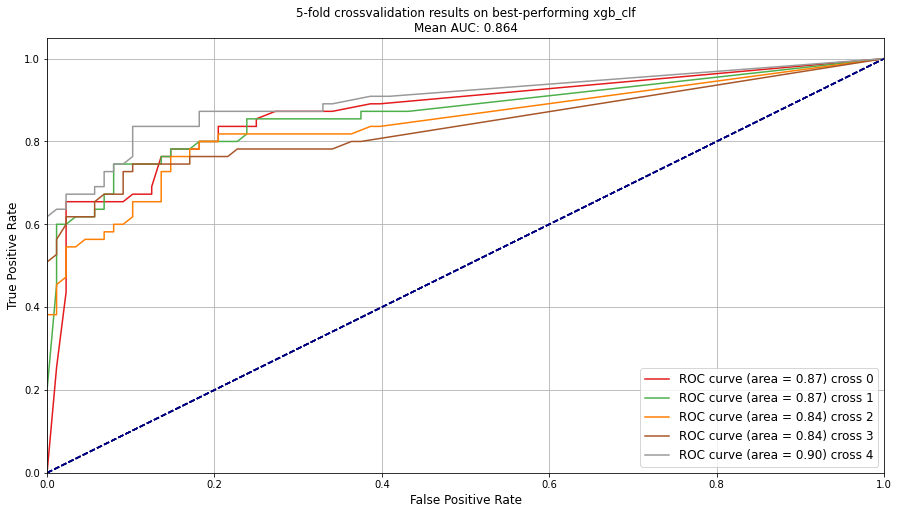

In [37]:
hgb.plot_cv()

Plot the best performing tree, and the ranked features.

[treeplot] >Best detected tree: 8


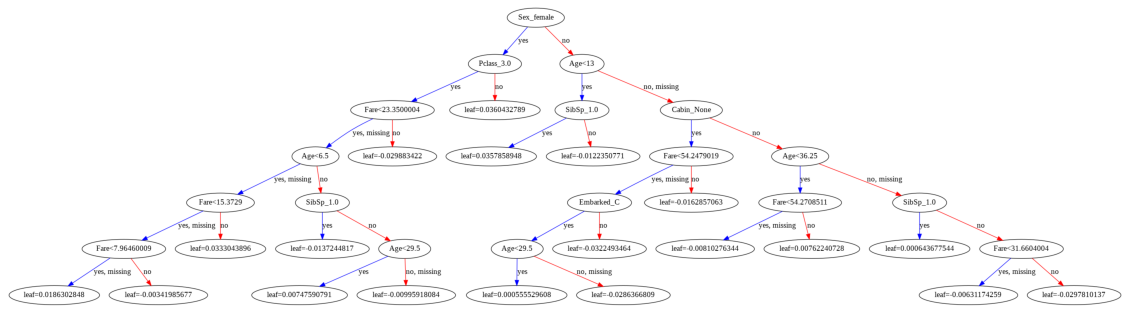

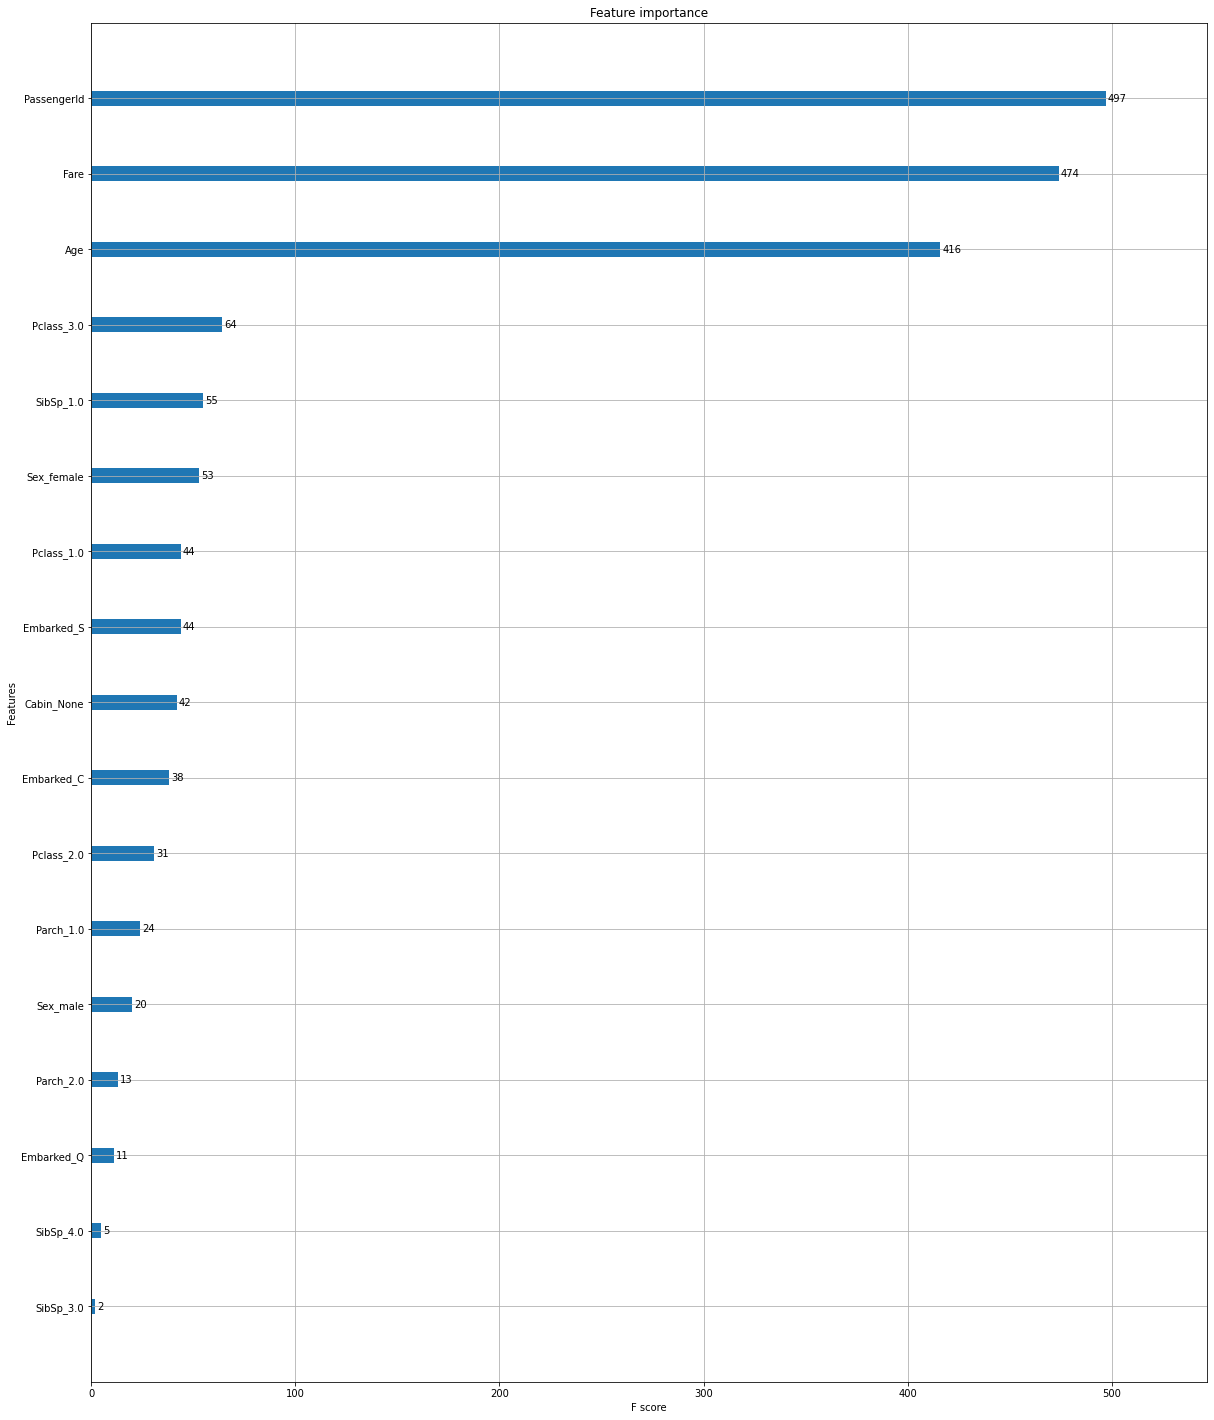

In [17]:
hgb.treeplot()

Evaluate the results on the independent validation dataset.

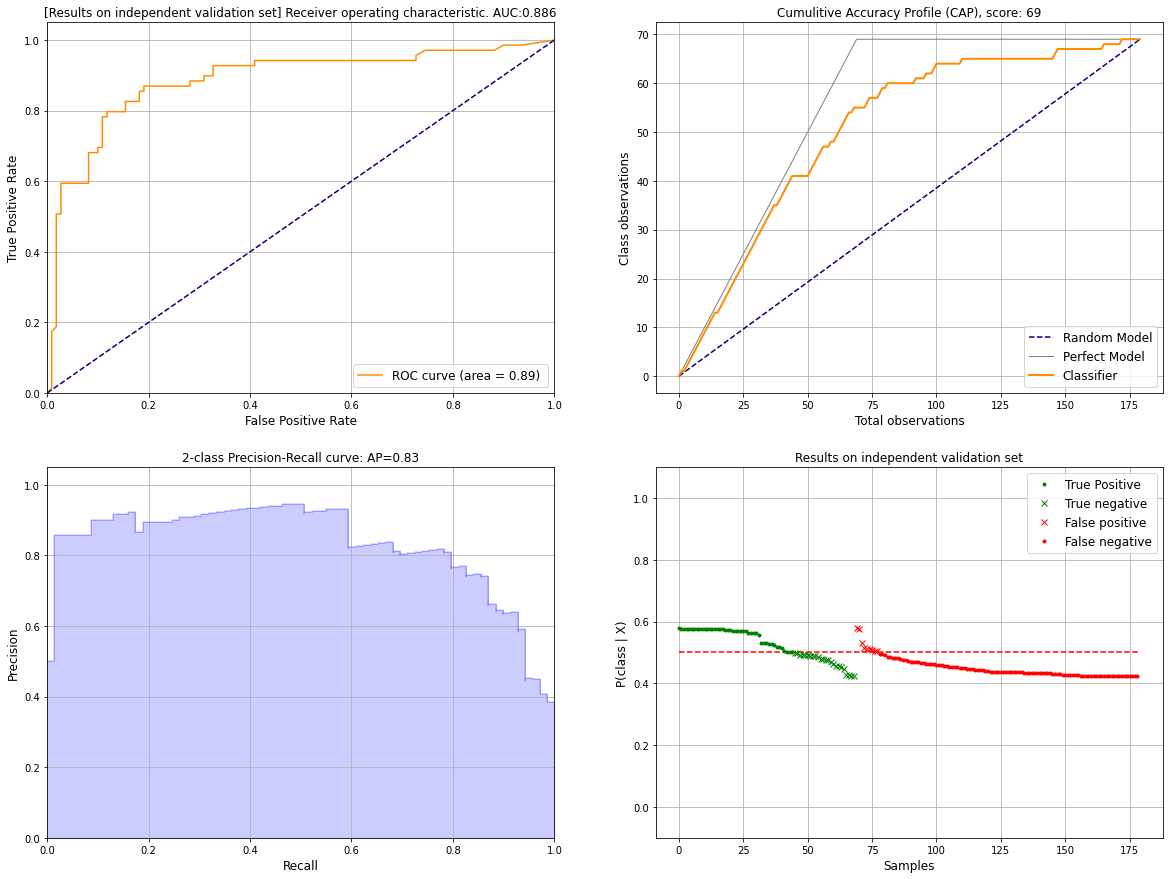

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff709914080>,
      dtype=object)

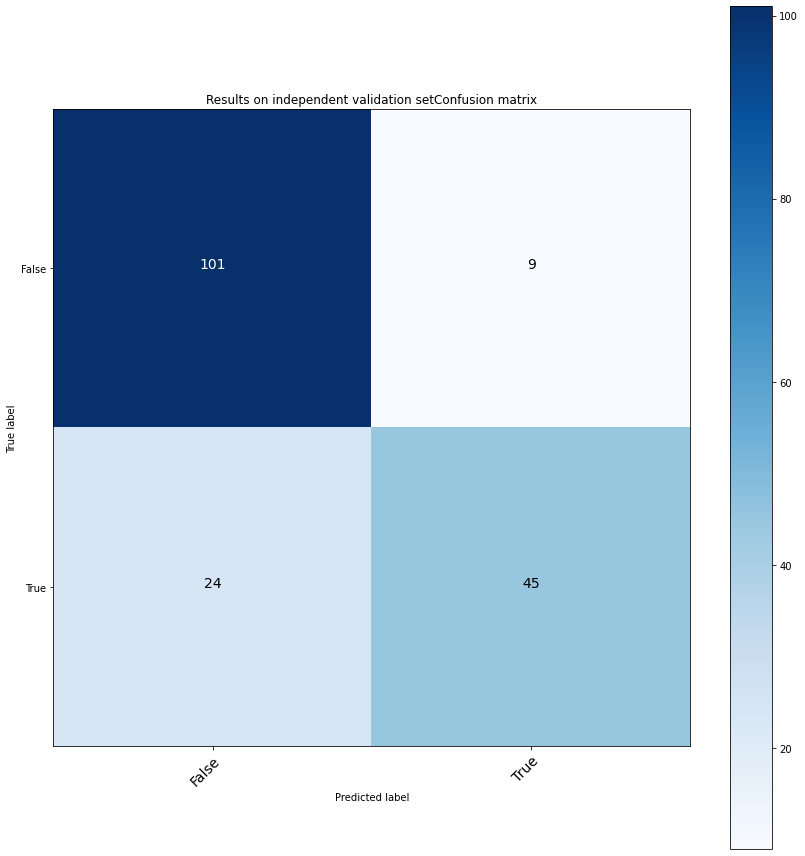

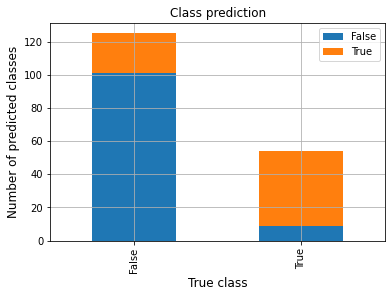

In [18]:

hgb.plot_validation()